In [1]:
import json
with open('lmg_pretrained_pipeline_reg.json', 'r') as f:
    data = json.load(f)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean, stdev

reg_weights = sorted([i['parameters']['reg_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), 0]
    return result

result = []
for reg in reg_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['reg_weight'] == reg], [])
    datas = []
    for trial in trials:
        last_epoch = trial[-1]
        datas.append(last_epoch)
    result.append({'reg_weight': reg, 'statistics': statistics_per_key(datas)})
    


sensitivity
[0.5223285555839539, 0.5167464017868042, 0.4433811902999878, 0.5901116132736206, 0.49441787600517273, 0.5039872527122498]
[0, 0, 0, 0, 0, 0]
specificity
[0.9820977449417114, 0.9791793823242188, 0.9766530394554138, 0.9495600461959839, 0.9584458470344543, 0.9123616814613342]
[0, 0, 0, 0, 0, 0]
accuracy
[0.9582851529121399, 0.9552288055419922, 0.9490335583686829, 0.9309433102607727, 0.9344126582145691, 0.8912109732627869]
[0, 0, 0, 0, 0, 0]
precision
[0.614564836025238, 0.5754884481430054, 0.5091575384140015, 0.3898840844631195, 0.39390090107917786, 0.23903177678585052]
[0, 0, 0, 0, 0, 0]
mcc
[0.5449191212319178, 0.5219019750363644, 0.448533837233721, 0.44494735288547205, 0.40706328439960743, 0.29582685707521705]
[0, 0, 0, 0, 0, 0]
micro_auroc
[0.9257842898368835, 0.910926878452301, 0.8887242078781128, 0.8798941373825073, 0.8730533719062805, 0.843987762928009]
[0, 0, 0, 0, 0, 0]


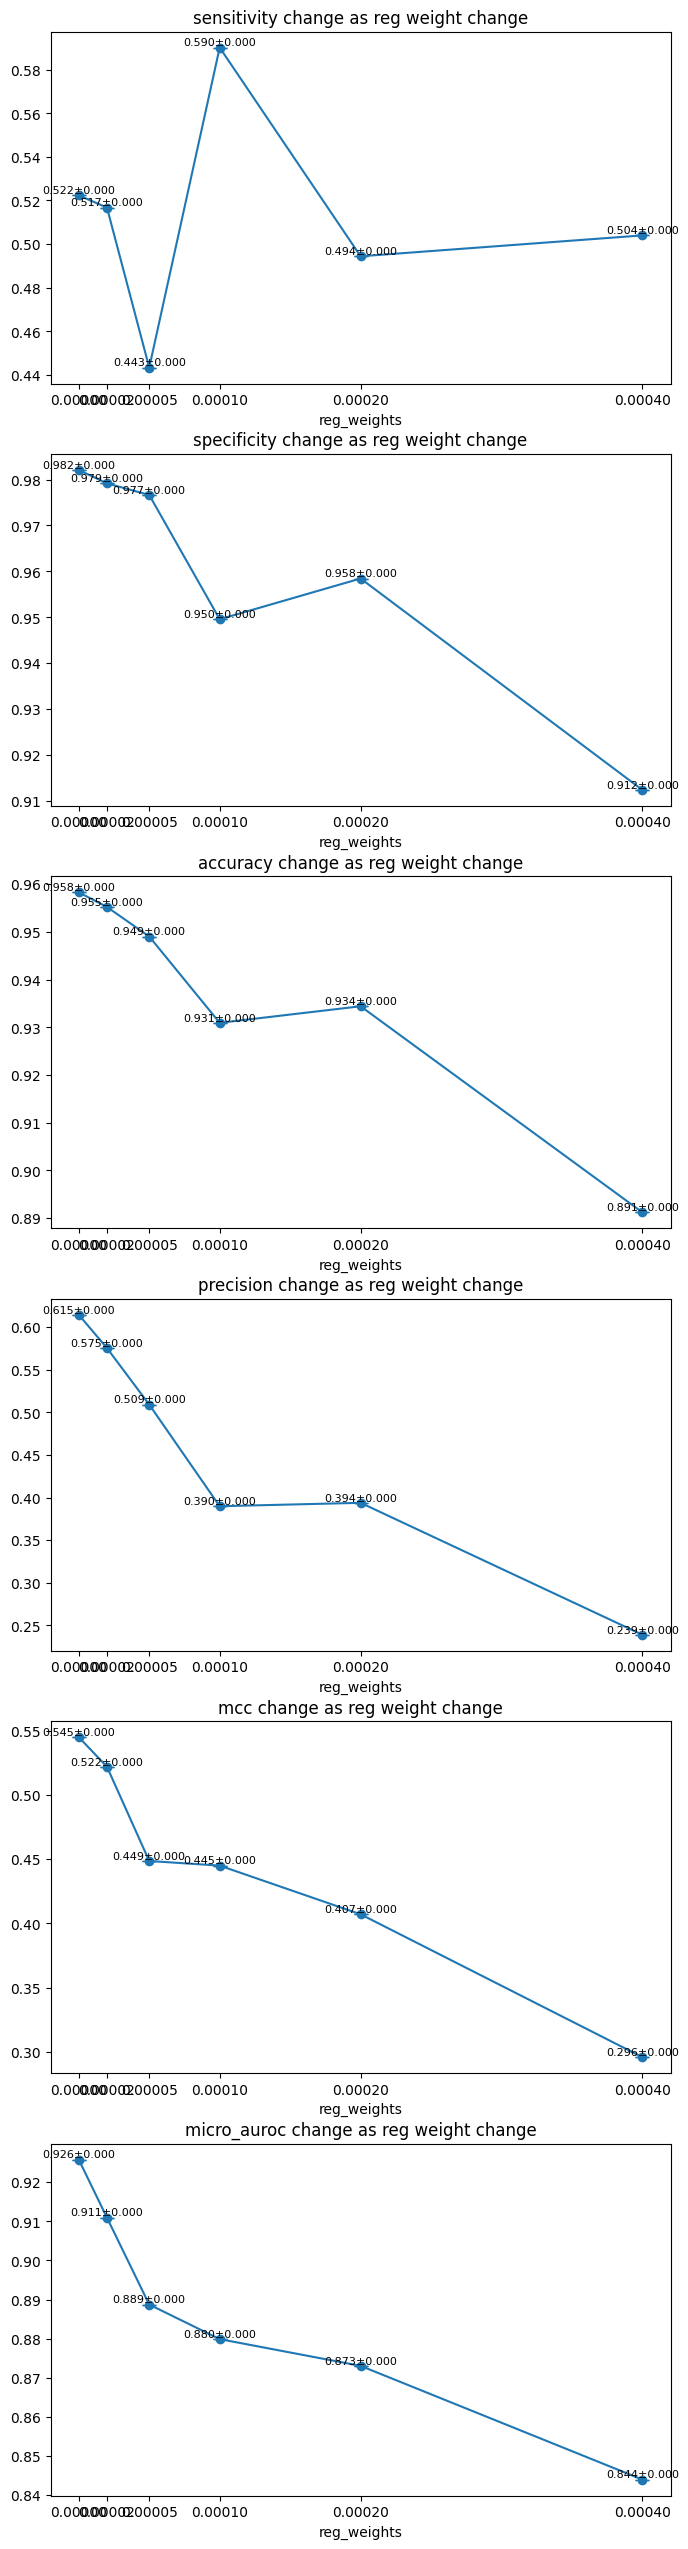

In [10]:
import matplotlib.pyplot as plt


metrics = ['sensitivity', 'specificity', 'accuracy', 'precision', 'mcc', 'micro_auroc']

fig, axs = plt.subplots(len(reg_weights), figsize=(8, 32))

for metric, ax in zip(metrics, axs):
    print(metric)
    metric_avg = [i['statistics'][metric][0] for i in result]
    metric_std = [i['statistics'][metric][1] for i in result]
    print(metric_avg)
    print(metric_std)
    ax.errorbar(reg_weights, metric_avg, yerr=metric_std, fmt='-o', capsize=5)
    ax.set_title(f'{metric} change as reg weight change')
    ax.set_xlabel('reg_weights')
    ax.set_xticks(reg_weights)

    for weight, avg, std in zip(reg_weights, metric_avg, metric_std):
        ax.text(weight, avg+std, f'{avg:.3f}±{std:.3f}', ha='center', va='bottom', fontsize=8)